In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('height_and_weight.csv')
df.head()

,Index,Height(In),Weight(lbs)
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


In [3]:
df.tail()

,Index,Height(In),Weight(lbs)
195,196,65.80,120.84
196,197,66.11,115.78
197,198,68.24,128.30
198,199,68.02,127.47
199,200,71.39,127.88


In [4]:
df.drop(columns=['Index'], inplace=True)

In [5]:
df.head()

,Height(In),Weight(lbs)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [6]:
df.tail()

,Height(In),Weight(lbs)
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47
199,71.39,127.88


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Height(In)   200 non-null    float64
 1   Weight(lbs)  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.describe()

,Height(In),Weight(lbs)
count,200.000000,200.000000
mean,67.949800,127.221950
std,1.940363,11.960959
min,63.430000,97.900000
25%,66.522500,119.895000
50%,67.935000,127.875000
75%,69.202500,136.097500
max,73.900000,158.960000


In [9]:
import seaborn as sns

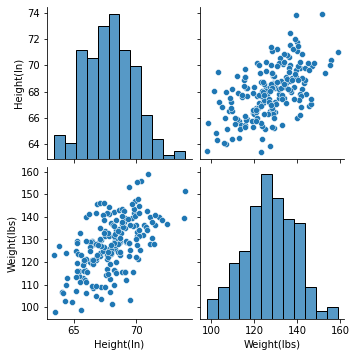

In [10]:
sns.pairplot(df)

<AxesSubplot:>

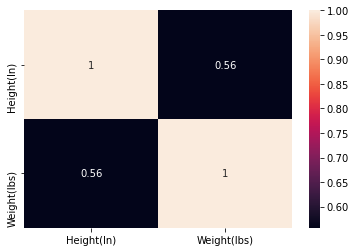

In [11]:
sns.heatmap(df.corr(), annot=True)

In [12]:
input_X = df[['Height(In)']]
output_Y = df[['Weight(lbs)']]

In [13]:
input_X

,Height(In)
0,65.78
1,71.52
2,69.40
3,68.22
4,67.79
...,...
195,65.80
196,66.11
197,68.24
198,68.02


In [14]:
output_Y

,Weight(lbs)
0,112.99
1,136.49
2,153.03
3,142.34
4,144.30
...,...
195,120.84
196,115.78
197,128.30
198,127.47


array([[<AxesSubplot:title={'center':'Height(In)'}>,
        <AxesSubplot:title={'center':'Weight(lbs)'}>]], dtype=object)

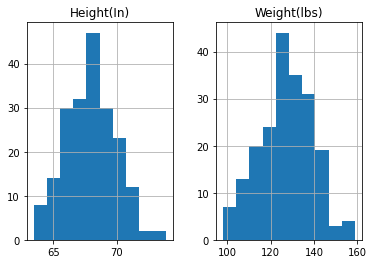

In [15]:
df.hist()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
input_X_train, input_X_test, output_Y_train, output_Y_test = train_test_split(input_X, output_Y, test_size=0.2)

In [18]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np

def cross_val(model):
    pred = cross_val_score(model, input_X, output_Y, cv=10)

    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    return mae, mse, rmse, r2_square

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

input_X_train = pipeline.fit_transform(input_X_train)
input_X_test = pipeline.transform(input_X_test)

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(input_X_train, output_Y_train)

LinearRegression(normalize=True)

In [21]:
lin_reg.intercept_

array([127.5355625])

In [22]:
coeff_df = pd.DataFrame(lin_reg.coef_, input_X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Height(In),6.755225


In [23]:
test_pred = lin_reg.predict(input_X_test)
train_pred = lin_reg.predict(input_X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(output_Y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(output_Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 7.152774302435371
MSE: 86.66677560313533
RMSE: 9.309499213337704
R2 Square 0.292474958339074
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.924295829772204
MSE: 101.18848350991145
RMSE: 10.059248655337607
R2 Square 0.3108063007511831
__________________________________


In [24]:
cmp = pd.DataFrame({'Actual Values': output_Y_train.values.flatten(), 'Predicted Values': train_pred.flatten()})
cmp

,Actual Values,Predicted Values
0,128.82,123.952913
1,133.98,135.481638
2,115.23,128.878498
3,129.10,131.769603
4,130.76,130.020663
...,...,...
155,102.84,114.244513
156,155.38,134.803478
157,121.23,126.272935
158,155.90,136.088413


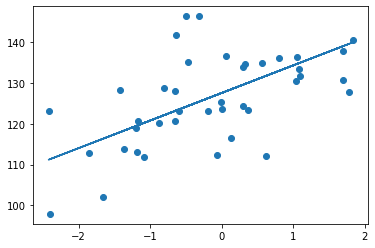

In [25]:
import matplotlib.pyplot as plt 

plt.scatter(input_X_test, output_Y_test)
plt.plot(input_X_test, test_pred)

<AxesSubplot:>

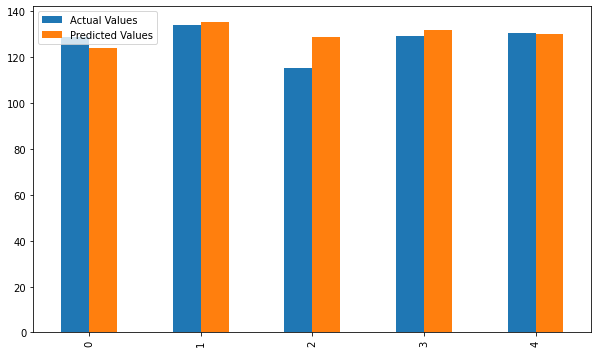

In [26]:
cmp.head().plot.bar(figsize=(10, 6))

<AxesSubplot:>

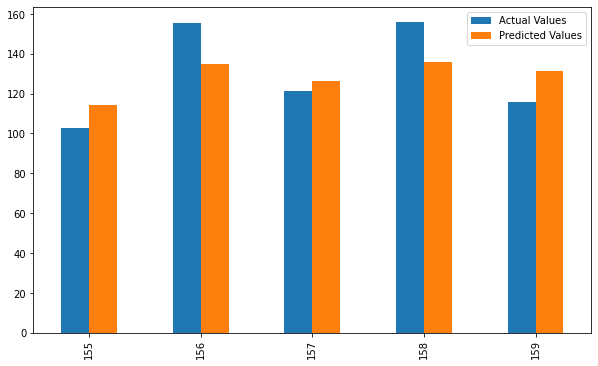

In [27]:
cmp.tail().plot.bar(figsize=(10, 6))